In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\User\My ML Models\Random Forest\titanic.csv')
df.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [3]:
new_df = df.drop(['sex'], axis=1)
new_df.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
#checking Nan value
new_df.isnull().sum()

survived      0
pclass        0
age         177
fare          0
dtype: int64

In [5]:
#177 missing value so we go with median
new_df['age'].median()

28.0

In [6]:
final_df = new_df.fillna(value=28,axis=1 )
final_df

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,28.0,23.4500
889,1,1,26.0,30.0000


In [7]:
#now there is no NaN value
final_df.isnull().sum()

survived    0
pclass      0
age         0
fare        0
dtype: int64

In [8]:
#independence and dependence feature
X = final_df.iloc[:,1:]
y = final_df.iloc[:,:1]

In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
#training our model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X,y)

C:\Users\User\AppData\Local\Temp/ipykernel_6156/172355182.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


RandomForestClassifier()

In [11]:
model.score(X_test,y_test)   #y_test is a truth value  

0.9552238805970149

In [12]:
#got 95% accuracy, where it made mistake 5%
y_predicted = model.predict(X_test)   #y_predicted is a predicted value

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[161,   7],
       [  5,  95]], dtype=int64)

Text(69.0, 0.5, 'truth')

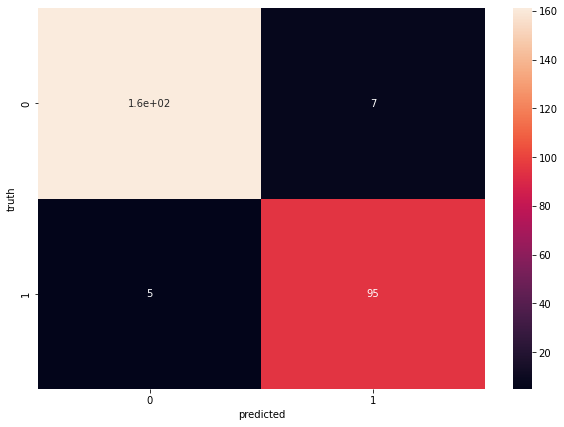

In [14]:
#plot confusion metrics graph
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [15]:
#prediction 1 of individual parameter
model.predict([[3,32.0,7.7500]])

array([0], dtype=int64)

In [16]:
#prediction 2 of individual parameter
model.predict([[1,26.0,30.0000]])

array([1], dtype=int64)